<a href="https://colab.research.google.com/github/MIchaelllee28/Modul2/blob/main/modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


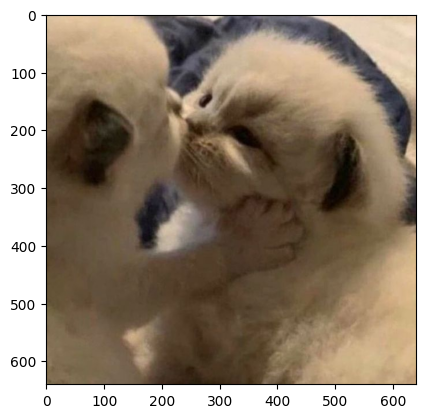

In [28]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/image processing/Pin on cats.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


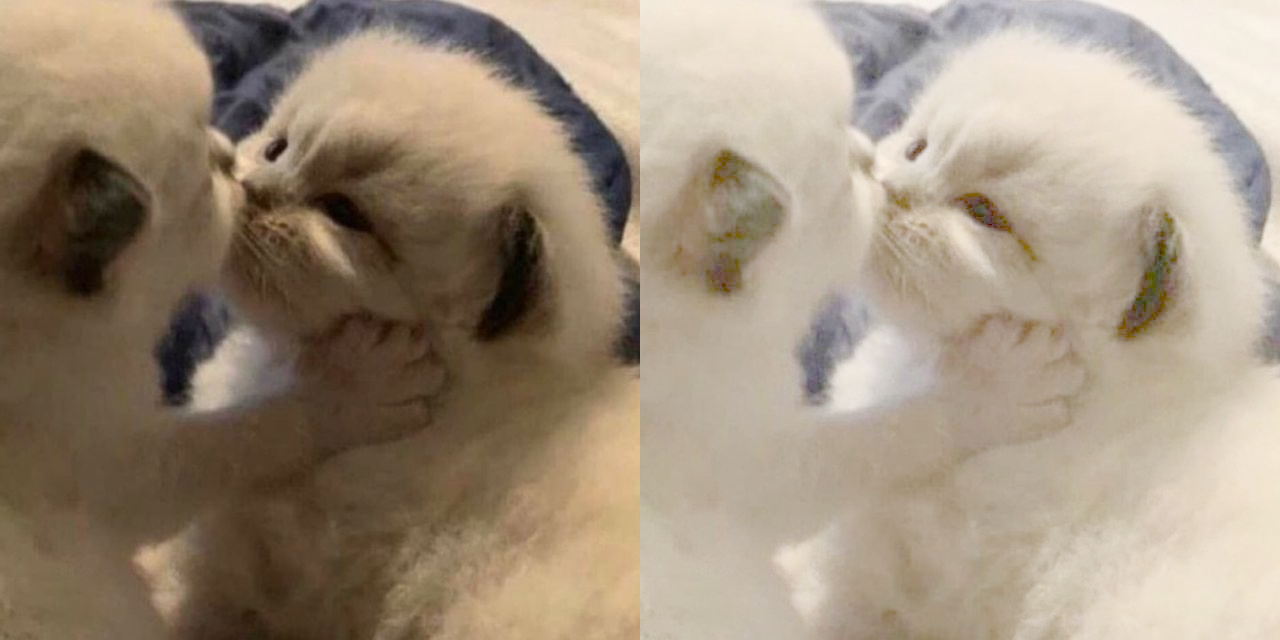

In [29]:
## NO 1: Gamma Correction
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

ori = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_img = np.zeros(ori.shape, ori.dtype)

#akses per pixel
for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):

     gamma_img[y,x,c] = np.clip(255 * pow(ori[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((ori, gamma_img))
cv2_imshow(final_frame)

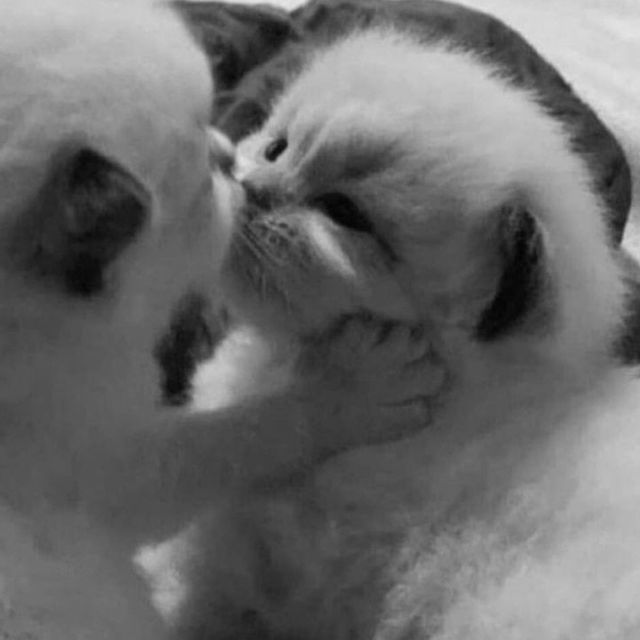

In [30]:
img = cv.imread('/content/drive/MyDrive/image processing/Pin on cats.jpg', cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(img)

 Bit Depth Pada Citra 


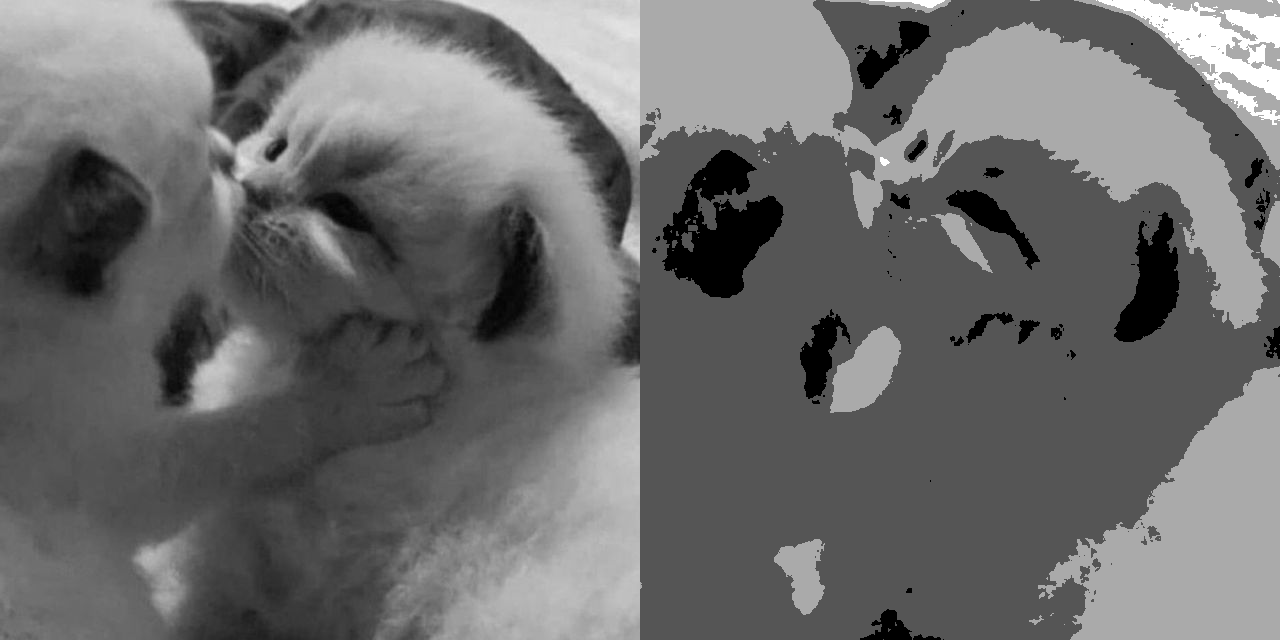

In [31]:
print(' Bit Depth Pada Citra ')
print('======================')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1) 

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_img[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);
depth_image = np.zeros(original.shape, original.dtype) 
final_frame = cv.hconcat((original, gamma_img))
cv2_imshow(final_frame)

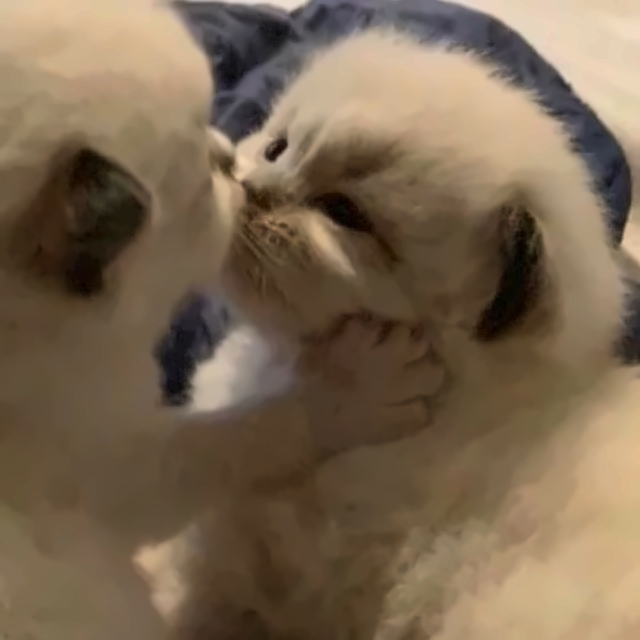

In [32]:
## NO 3
import glob
from math import log10, sqrt
cv_img = []
for img in glob.glob('/content/drive/MyDrive/imageprocess-x/*'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(dst)

In [33]:
def PSNR(img,amount):
  image1 = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    image1 = image1 - img[x]
    # print(x)
  mse = np.mean((image1) ** 2)
  if(mse == 0): 
    return 100
  pixel = 255.0
  psnr = 20 * log10(pixel / sqrt(mse))
  return psnr

print(' PSNR ')
print('----------------------------------')
try:
  avg_denoising = int(input('Masukkan nilai Average Denoising: '))
except ValueError:
  print('Error, not a number')
psnr= PSNR(cv_img,avg_denoising)
print('Nilai PSNR adalah: ',psnr, '(dB)')

 PSNR 
----------------------------------
Masukkan nilai Average Denoising: 100
Nilai PSNR adalah:  28.834154678150338 (dB)


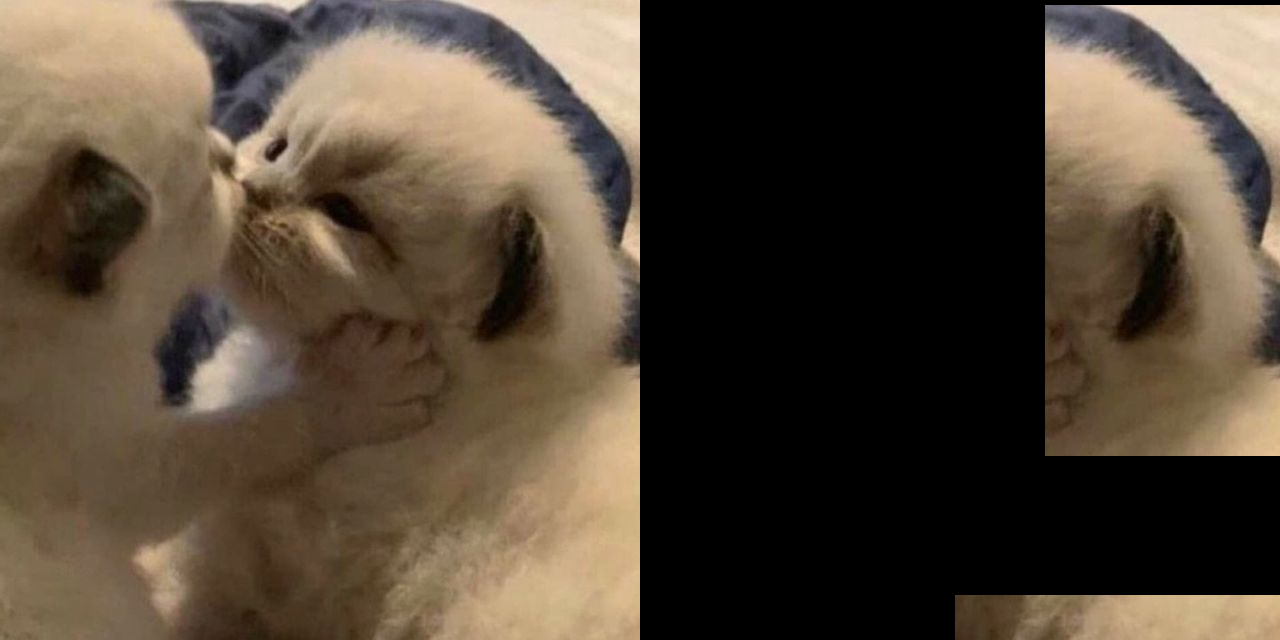

In [35]:
##NO 4
ori = image = cv.imread('/content/drive/MyDrive/image processing/Pin on cats.jpg')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = ori & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = ori & mask1

teeth_frame = cv.hconcat((ori, result))
cv2_imshow(teeth_frame)

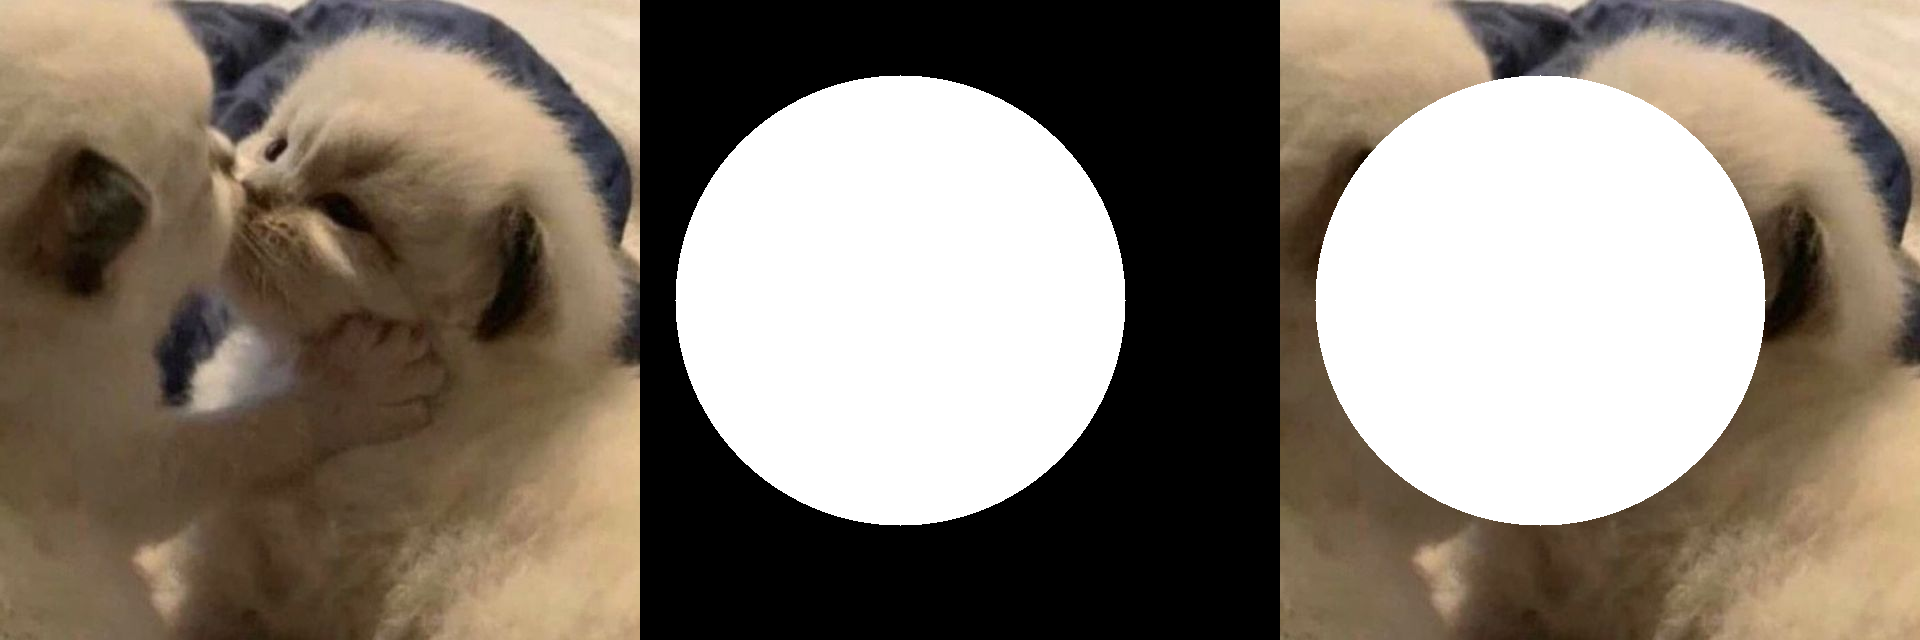

In [36]:
##NO 5
## OR
rose = cv.imread('/content/drive/MyDrive/image processing/Pin on cats.jpg')

mask = np.zeros(rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = rose | mask

rose_frame = cv.hconcat((rose, mask, masked))
cv2_imshow(rose_frame)


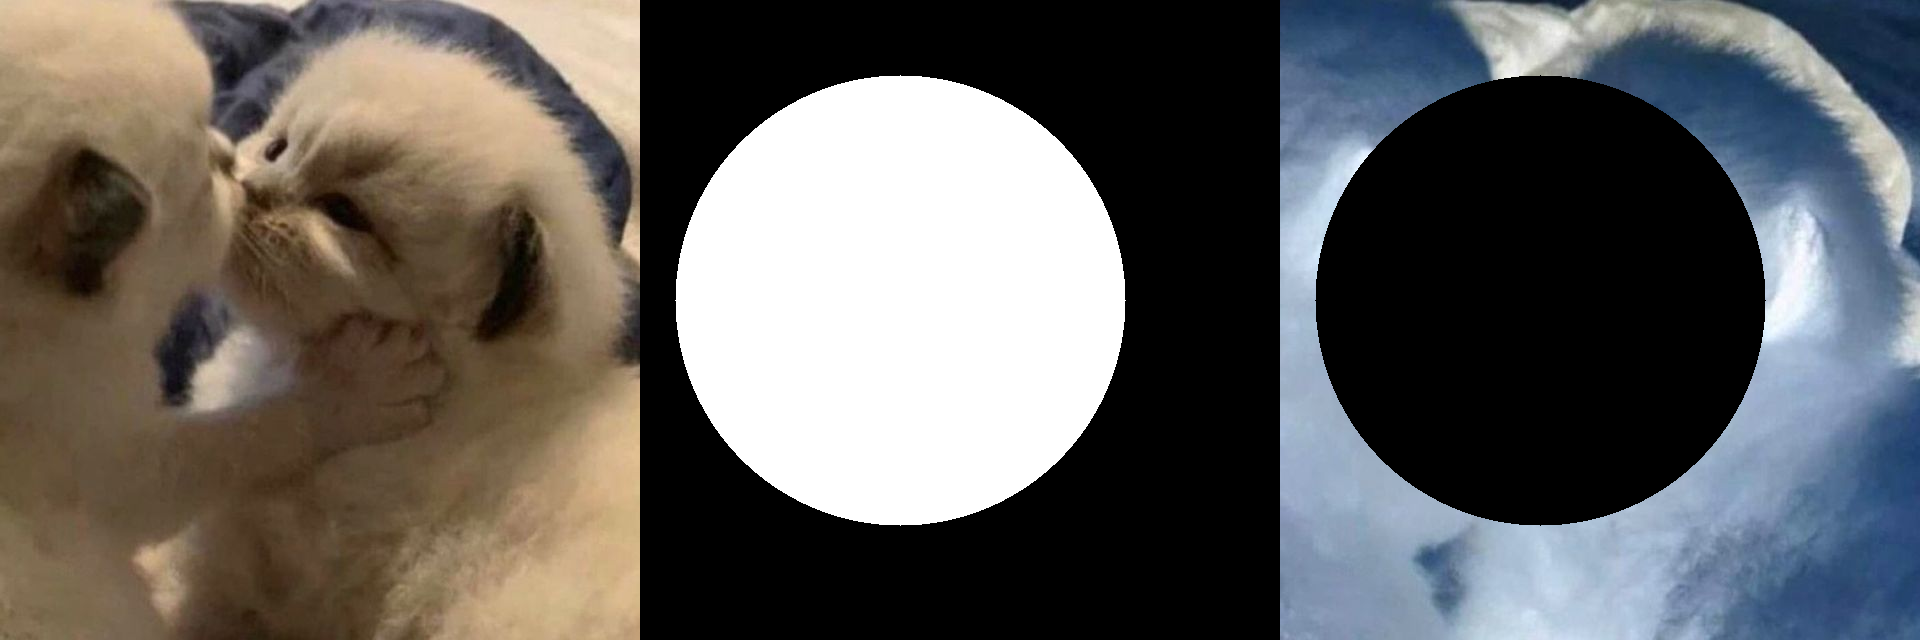

In [37]:
## NOT
mask = np.zeros(rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~rose & ~mask

rose_frame = cv.hconcat((rose, mask, masked))
cv2_imshow(rose_frame)

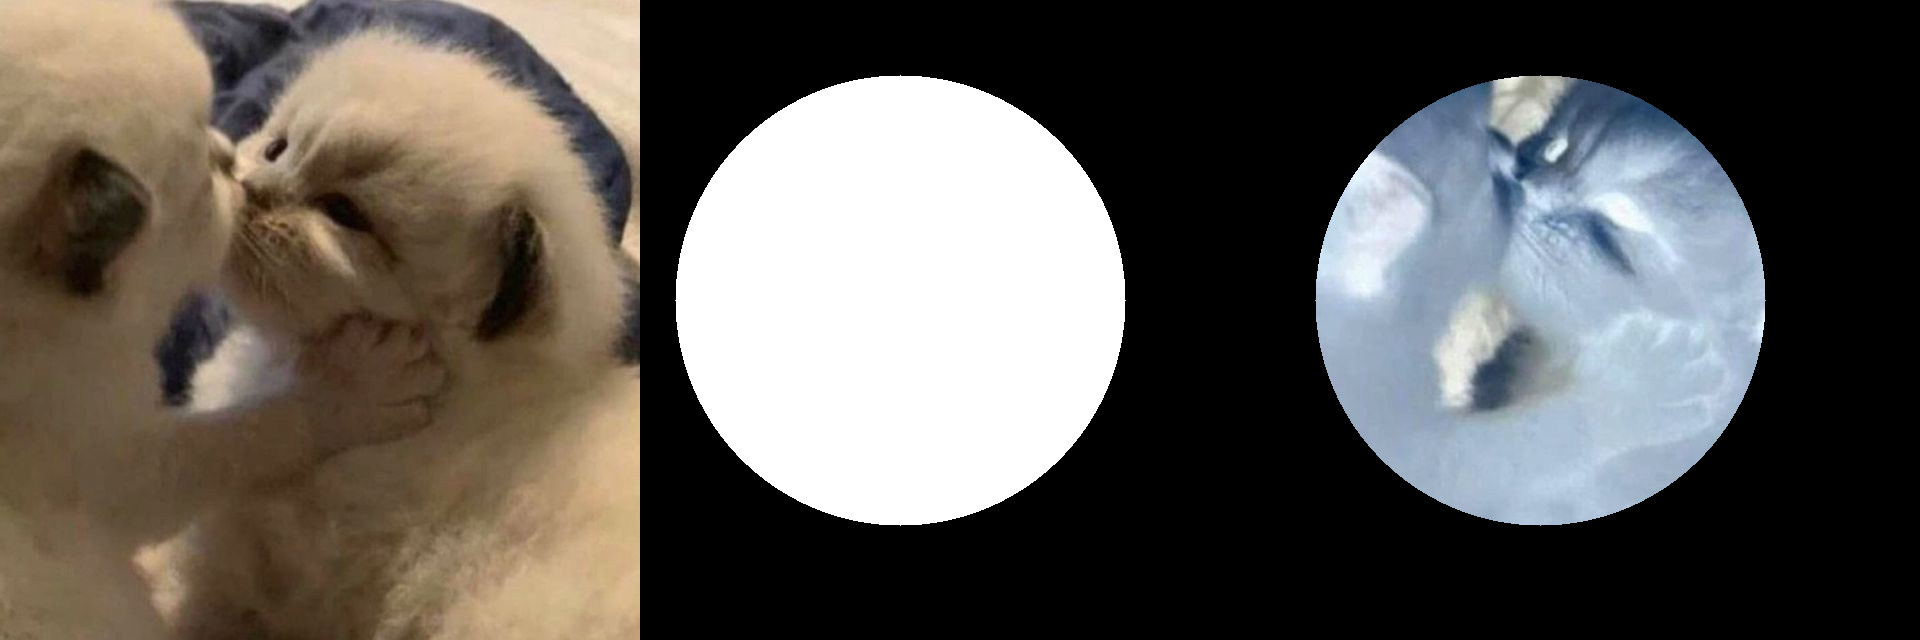

In [38]:
## NAND
mask = np.zeros(rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~rose & mask

rose_frame = cv.hconcat((rose, mask, masked))
cv2_imshow(rose_frame)

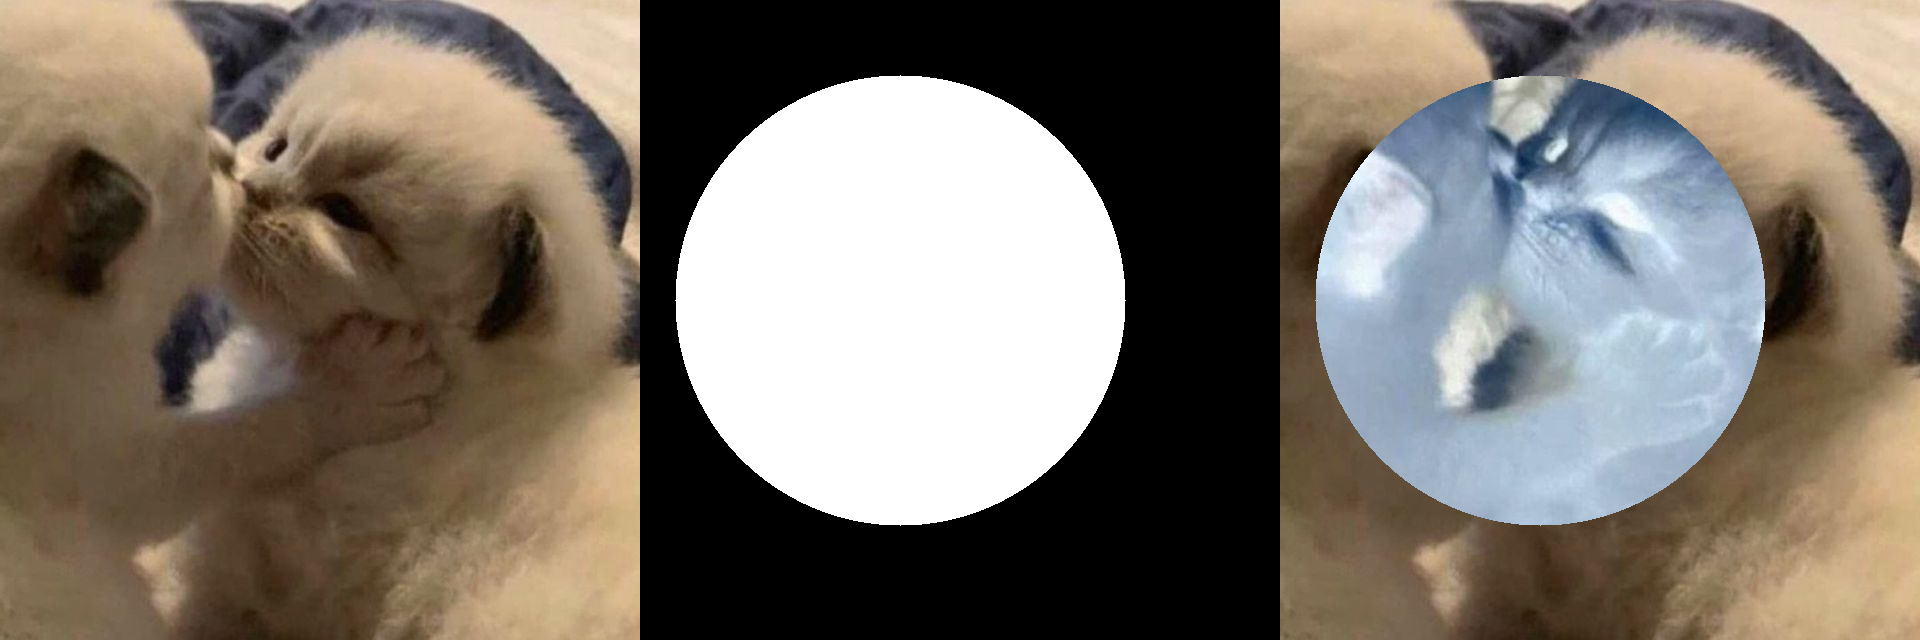

In [39]:
## XOR
mask = np.zeros(rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = rose ^ mask

rose_frame = cv.hconcat((rose, mask, masked))
cv2_imshow(rose_frame)